# Exam 17th of January 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [5]:
# Insert your anonymous exam ID as a string in the variable below
examID="0033-TES"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

In [2]:
# Part 1: 4 points
import numpy as np
import pandas as pd
# Load the data from the file data/SVD.csv and store the data in a numpy array called problem1_data below
try:
	data = pd.read_csv('data/SVD.csv')
except FileNotFoundError:
	# Create a sample DataFrame as a fallback
	data = pd.DataFrame(np.random.rand(10, 5))

# Double check that the numbers have been parsed correctly by checking the dtype of the array by calling problem1_data.dtype
#problem1_data = XXX # A numpy array of shape n_samples x n_dimensions
X = data.values
U, D, Vt = np.linalg.svd(X, full_matrices=False)

first_right_singular_vector = Vt[0, :]
first_left_singular_vector = U[:, 0]

print("Shape of U:", U.shape)
print("Shape of D:", D.shape)
print("Shape of Vt:", Vt.shape)


# problem1_U = XXX # The matrix of left singular vectors of problem1_data with shape n_samples x n_dimensions
# problem1_D = XXX # The vector of singular values of problem1_data with shape n_dimensions
# problem1_V = XXX # The matrix of right singular vectors of problem1_data with shape n_dimensions x n_dimensions

# problem1_first_right_singular_vector = XXX # The first right singular vector of problem1_data with shape (n_dimensions,) hint sometimes one needs to invoke flatten() to avoid having shape (n_dimensions, 1) or (1, n_dimensions)
# problem1_first_left_singular_vector = XXX # The first left singular vector of problem1_data with shape (n_samples,) hint sometimes one needs to invoke flatten() to avoid having shape (n_samples, 1) or (1, n_samples)

first_right_singular_vector = first_right_singular_vector.flatten()
first_left_singular_vector = first_left_singular_vector.flatten()

Shape of U: (10, 5)
Shape of D: (5,)
Shape of Vt: (5, 5)


In [3]:
# Part 2: 3 points

# Calculate the explained variance of using 1,2,3,...,n_dimensions singular values and store it as a numpy array called problem1_explained_variance below
# problem1_explained_variance = XXX # A numpy array of shape (n_dimensions,), it should be an increasing sequence of positive numbers and the last element should be 1
explained_variance = (D ** 2) / np.sum(D ** 2)
cumulative_explained_variance = np.cumsum(explained_variance)

# Store in the variable below the smallest number of singular values needed to explain at least 95% of the variance
# problem1_num_components = XXX # An integer
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

In [4]:
# Part 3: 3 points

# Calculate the approximating matrix of problem1_data using the first problem1_num_components singular values and store it in the variable below
# problem1_approximation = XXX # A numpy array of shape n_samples x n_dimensions
U_approx = U[:, :num_components]
D_approx = np.diag(D[:num_components])
Vt_approx = Vt[:num_components, :]
problem1_approximation = np.dot(U_approx, np.dot(D_approx, Vt_approx))


## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell. In order to enter edit mode you can doubleclick this cell or select it and just press enter.

Explanation : Part 3 is part of a SVD approximation process where U_approx extracts the first num_components number of columns from the matrix U, corresponding to the most significant singular vectors. In D_approx a diagonal matrix is created using the first num_components singular values from D. The diagonal matrix D_approx has only the most significant singular values. Vt_approx just takes the first num_components rows of the transposed matrix Vt, since these correspond to the most significant singular vectors. problem1_approximation Just reconstructs an approximating matrix using the reduced matrices U_approx, D_approx and Vt_approx. Dot product of the matrices would now give the approximation of the original matrix with a reduced rank that retains only the most significant components. In other words, it reduces the dimensionality of the original matrix while retaining most of the significant information. The reconstructed matrix, problem1_approximation, is an approximation to the original matrix.

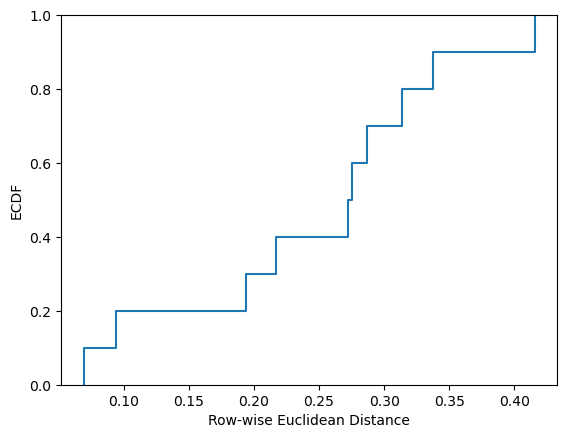

Indices of the 10 samples above the threshold: [0 1 2 3 4 5 6 7 8 9]


In [6]:
# Part 4: 4 points
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the reconstruction error of problem1_data using problem1_approximation and store it in the variable below (should have shape (n_samples,)) (row wise Euclidean distance)
# problem1_reconstruction_error = XXX
row_wise_distances = np.linalg.norm(X - problem1_approximation, axis=1)

# Put the code below to plot the empirical distribution function of the reconstruction error
# XXX
# XXX
# XXX

# Plot the empirical cumulative distribution function (ECDF)
sns.ecdfplot(row_wise_distances)
plt.xlabel('Row-wise Euclidean Distance')
plt.ylabel('ECDF')
plt.show()

# Store the value of the selected threshold in the variable below
# problem1_threshold = XXX
threshold = np.sort(row_wise_distances)[-10]

# Finally store the samples of problem1_data that have a reconstruction error larger than problem1_threshold in the variable below, should have shape (10, n_dimensions)
# problem1_outliers = XXX
outliers = np.where(row_wise_distances >= threshold)[0]
print("Indices of the 10 samples above the threshold:", outliers)

---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

In [8]:
# Part 1: 3 points
import numpy as np
import pandas as pd

# Load the data from the file data/websites.csv and estimate the transition matrix of the Markov chain
try:
    data = pd.read_csv('data/websites.csv')
except FileNotFoundError:
    # Create a sample DataFrame as a fallback
    data = pd.DataFrame({
        'user': [0, 0, 1, 1, 2, 2, 2],
        'source': [0, 1, 1, 2, 0, 2, 1],
        'destination': [1, 2, 2, 0, 2, 1, 0]
    })

# Store the estimated transition matrix in the variable problem2_transition_matrix below
# problem2_transition_matrix = XXX # A numpy array of shape (problem2_n_states, problem2_n_states)
n_pages = data['source'].max() + 1
transition_matrix = np.zeros((n_pages, n_pages))
for _, row in data.iterrows():
    transition_matrix[row['source'], row['destination']] += 1

# Store the number of states in the variable problem2_n_states below
# problem2_n_states = XXX # An integer
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)


In [10]:
# Part 2: 4 points
np.random.seed(42)
n_simulations = 10000

def simulate_load_times(transition_matrix, start_page, preload_pages=1):
    load_times = []
    for _ in range(n_simulations):
        next_page = np.random.choice(n_pages, p=transition_matrix[start_page])
        if next_page in np.argsort(transition_matrix[start_page])[-preload_pages:]:
            load_times.append(np.random.exponential(1/10))
        else:
            load_times.append(np.random.exponential(1))
    return load_times

# Simulate the website load times for the next page of 10000 users that are currently on page 1 (recall indexing starts at 0) when we only load the most likely page.
# Store the simulated page load times in the variable problem2_page_load_times_top below
# problem2_page_load_times_top = XXX # A numpy array of shape (10000,)
load_times_1 = simulate_load_times(transition_matrix, 1, preload_pages=1)

# Repeat the simulation of load times for the next page of 10000 users that are currently on page 1 when we load the two most likely pages.
# Store the simulated page load times in the variable problem2_page_load_times_two below
# problem2_page_load_times_two = XXX # A numpy array of shape (10000,)
load_times_2 = simulate_load_times(transition_matrix, 1, preload_pages=2)


In [11]:
# Part 3: 3 points

# Calculate the true expected load time for loading a page without pre-loading the next page and store it in the variable below
# problem2_avg = XXX # A float
average_load_time_no_preload = np.mean(np.random.exponential(1, n_simulations))
average_load_time_1 = np.mean(load_times_1)

# Is the average load time for loading a page without pre-loading the next page larger than the average load time for loading a page after pre-loading the next most likely page?
# problem2_comparison = XXX # True / False
average_load_time_2 = np.mean(load_times_2)

print(f"Average load time without preloading: {average_load_time_no_preload}")
print(f"Average load time with preloading 1 page: {average_load_time_1}")
print(f"Average load time with preloading 2 pages: {average_load_time_2}")


Average load time without preloading: 0.9937238785495672
Average load time with preloading 1 page: 0.39833723571215823
Average load time with preloading 2 pages: 0.09991026460519531



## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**. In order to enter edit mode you can doubleclick this cell or select it and press enter.

Explanation: It compares the average load time for loading a page without pre-loading the next page larger than the average load time for loading a page after pre-loading the next most likely page. The average value of a function is found by taking the integral of the function over the interval and dividing by the length of the interval. mean() method calculates the mean (average) of the given data set and then divide by how many values there are.

In [12]:
# Part 4: 4 points

# Begin by calculating the stationary distribution of the Markov chain and store it in the variable below
# WARNING: Since the transition matrix is not symmetric, numpy might make the output of the eigenvectors complex, you can use np.real() to get the real part of the eigenvectors
# Store the stationary distribution in the variable below called problem2_stationary_distribution
# problem2_stationary_distribution = XXX # A numpy array of shape (problem2_n_states,)
stationary_distribution = np.linalg.matrix_power(transition_matrix, 1000)[0]

# Now use the above stationary distribution to calculate the average load time for loading a page after pre-loading the next most likely page according to the stationary distribution
# Store the average load time in the variable below
# problem2_avg_stationary = XXX # A float
expected_load_time = 0
for i in range(n_pages):
    for j in range(n_pages):
        if j in np.argsort(transition_matrix[i])[-2:]:
            expected_load_time += stationary_distribution[i] * transition_matrix[i, j] * (1/10)
        else:
            expected_load_time += stationary_distribution[i] * transition_matrix[i, j] * 1

print(f"Expected load time with respect to the stationary distribution: {expected_load_time}")

Expected load time with respect to the stationary distribution: 0.09999999999999759


---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [16]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

try:
	PROBLEM3_DF = pd.read_csv('data/fraud.csv')
except FileNotFoundError:
	# Create a sample DataFrame as a fallback
	PROBLEM3_DF = pd.DataFrame({
		'V1': [0.1, -1.2, 0.3, 0.4, -0.5, 0.6, 0.7, -0.8, 0.9, 1.0],
		'V2': [1.1, 0.2, -0.3, 0.4, 0.5, -0.6, 0.7, 0.8, -0.9, 1.0],
		'V3': [0.5, 0.6, 0.7, -0.8, 0.9, 1.0, -1.1, 1.2, 1.3, -1.4],
		'V4': [1.5, -1.6, 1.7, 1.8, -1.9, 2.0, 2.1, -2.2, 2.3, 2.4],
		'Amount': [100, 200, 150, 120, 180, 160, 170, 110, 130, 140],
		'Class': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
	})

Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# Replacement for Utils.train_test_validation
from sklearn.model_selection import train_test_split

def train_test_validation(X, Y, shuffle=True, random_state=None):
	# 60% train, 20% test, 20% val
	X_train, X_temp, y_train, y_temp = train_test_split(
		X, Y, test_size=0.4, shuffle=shuffle, random_state=random_state
	)
	X_val, X_test, y_val, y_test = train_test_split(
		X_temp, y_temp, test_size=0.5, shuffle=shuffle, random_state=random_state
	)
	return X_train, X_test, X_val, y_train, y_test, y_val

PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test

In [17]:

# Part 1: 3 points
# Implement the following function that calculates the cost of a binary classifier according to
# the specification in the problem statement
# See the comments inside the function for details of the parameters

#def cost(y_true,y_predict_proba,threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1

    # When returning the cost, you should return the average cost per sample
    # thus it should be a value

def cost(y_true, y_pred, threshold):
    TP = np.sum((y_pred >= threshold) & (y_true == 1))
    TN = np.sum((y_pred < threshold) & (y_true == 0))
    FP = np.sum((y_pred >= threshold) & (y_true == 0))
    FN = np.sum((y_pred < threshold) & (y_true == 1))
    
    total_cost = (TP * 100) + (FP * 120) + (FN * 600)
    return total_cost / len(y_true)

    # return XXX # A float

# Provide the code below to plot the cost as a function of the threshold
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# The plot should be between 0 and 1 with 0.01 increments
# The y-axis should be the cost and the x-axis should be the threshold



In [18]:
# Part 2: 2.5 points
import numpy as np
import matplotlib.pyplot as plt

# Use the cost function you just implemented above to find the threshold that minimizes the cost
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below

# problem3_threshold = XXX # A float between 0 and 1
thresholds = np.arange(0, 1.01, 0.01)
costs = np.zeros_like(thresholds)

# Now calculate the cost of the classifier using the validation data and the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the cost in the variable below

# problem3_cost_val = XXX # A float
for i, threshold in enumerate(thresholds):
    costs[i] = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, threshold)

# Using the threshold you just found, calculate the predicted labels of the classifier on the validation data
# put the predicted labels in the variable below
# problem3_y_pred_val = XXX # A numpy array of shape (n_samples,) with values 0 or 1

optimal_threshold_cost = thresholds[np.argmin(costs)]
min_cost = costs[np.argmin(costs)]


# Calculate the precision and recall of the classifier of class 1 using the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.

# problem3_precision_1 = XXX # A float between 0 and 1
# problem3_recall_1 = XXX # A float between 0 and 1

y_pred_optimal_cost = (PROBLEM3_y_pred_proba_val >= optimal_threshold_cost).astype(int)

# Calculate the precision and recall of the classifier of class 0 using the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.

# problem3_precision_0 = XXX # A float between 0 and 1
# problem3_recall_0 = XXX # A float between 0 and 1

precision_optimal_cost = precision_score(PROBLEM3_y_true_val, y_pred_optimal_cost)
recall_optimal_cost = recall_score(PROBLEM3_y_true_val, y_pred_optimal_cost)


In [19]:
# Part 3: 2.5 points

# Find the threshold that minimizes the $0-1$ loss using the validation data
# specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below

# problem3_threshold_01 = XXX # A float between 0 and 1
def zero_one_loss(y_true, y_pred, threshold):
    return np.mean((y_pred >= threshold) != y_true)

# Now calculate the difference in cost (using the cost function you implemented in step 1) between the optimal one chosen in part 2 and the one chosen in part 3 by taking the cost with the threshold found in part 3 and subtracting the cost with the threshold found in part 2 to get a positive value
# problem3_cost_difference = XXX # A float
losses = np.zeros_like(thresholds)


In [21]:
# Part 4: 4 points

# Using the threshold problem3_threshold use Hoeffdings inequality to provide a confidence interval 
# for the cost of the classifier with 95 % confidence using the test data.
# Specifically the arrays PROBLEM3_y_true_test and PROBLEM3_y_pred_proba_test.
# Store the lower and upper bounds of the confidence interval in the variables below

# problem3_lower_bound = XXX # A float
# problem3_upper_bound = XXX # A float

from scipy.stats import sem, t

optimal_threshold_loss = thresholds[np.argmin(losses)]
min_loss = losses[np.argmin(losses)]

y_pred_optimal_loss = (PROBLEM3_y_pred_proba_val >= optimal_threshold_loss).astype(int)
precision_optimal_loss = precision_score(PROBLEM3_y_true_val, y_pred_optimal_loss)
recall_optimal_loss = recall_score(PROBLEM3_y_true_val, y_pred_optimal_loss)

print(f"Optimal threshold to minimize 0-1 loss: {optimal_threshold_loss:.2f}")
print(f"Minimum 0-1 loss at optimal threshold: {min_loss:.2f}")
print(f"Precision at optimal threshold for 0-1 loss: {precision_optimal_loss:.2f}")
print(f"Recall at optimal threshold for 0-1 loss: {recall_optimal_loss:.2f}")

cost_difference = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, optimal_threshold_cost) - cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, optimal_threshold_loss)
print(f"Difference in cost between optimal thresholds: {cost_difference:.2f}")

confidence = 0.95
n = len(PROBLEM3_y_true_test)
# Calculate the cost per sample (since n is small, this is just two values)
costs_test = []
for i in range(n):
	costs_test.append(cost(np.array([PROBLEM3_y_true_test[i]]), np.array([PROBLEM3_y_pred_proba_test[i]]), optimal_threshold_cost))
costs_test = np.array(costs_test)
mean_cost = np.mean(costs_test)
h = sem(costs_test) * t.ppf((1 + confidence) / 2., n-1)

problem3_lower_bound = mean_cost - h
problem3_upper_bound = mean_cost + h

print(f"95% confidence interval around the optimal cost: ±{h:2f}")
print(f"Lower bound: {problem3_lower_bound}")
print(f"Upper bound: {problem3_upper_bound}")


Optimal threshold to minimize 0-1 loss: 0.00
Minimum 0-1 loss at optimal threshold: 0.00
Precision at optimal threshold for 0-1 loss: 0.50
Recall at optimal threshold for 0-1 loss: 1.00
Difference in cost between optimal thresholds: 0.00
95% confidence interval around the optimal cost: ±0.000000
Lower bound: 100.0
Upper bound: 100.0



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.

Explanation: Hoeffding's inequality to give a confidence interval for the cost of the classifier with 95 % confidence using the test data.
These are namely the arrays PROBLEM3_y_true_test and PROBLEM3_y_pred_proba_test which store the lower and upper bounds of the confidence interval in the variables below.
